# CAP 6619 - Deep Learning - Dr Marques
## Project 1
## Image Classifiers Using Neural Networks and the MNIST and Fashion MNIST Datasets

Sai Jhansi Kongara


https://colab.research.google.com/drive/14waohc6SvTW0nlD_zvmEk7-GRUMqqFc8?usp=sharing

Useful references and sources:

**MNIST**

- https://www.tensorflow.org/datasets/catalog/mnist

- https://en.wikipedia.org/wiki/MNIST_database

- https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb

**Fashion MNIST**

- https://www.tensorflow.org/datasets/catalog/fashion_mnist

- https://en.wikipedia.org/wiki/Fashion_MNIST

- https://keras.io/api/datasets/fashion_mnist/

## PART 1 - *MNIST classifier using MLP*




### Import Needed Resources / Libraries

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from keras import layers

from matplotlib import pyplot as plt

import numpy as np
import tensorflow as tf

### Load and prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Examine Data

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

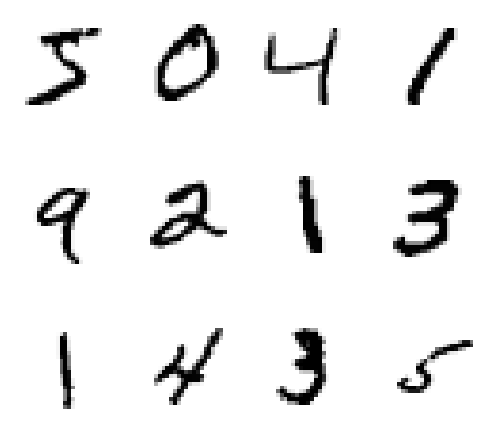

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

In [9]:
y_valid[0]

np.uint8(7)

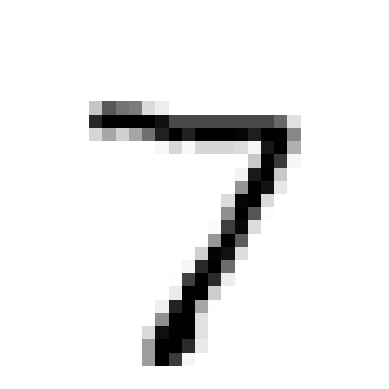

In [10]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [11]:
# Reshape (flatten) images
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [12]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [13]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Configure model

In [14]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
(64*784)

50176

In [17]:
(64*784)+64

50240

In [18]:
(10*64)+10

650

In [19]:
model.compile(
    loss='mean_squared_error',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

### Train!

In [20]:
batch_size=128
epochs=200

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0912 - loss: 0.0911 - val_accuracy: 0.0985 - val_loss: 0.0906
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0938 - loss: 0.0906 - val_accuracy: 0.1096 - val_loss: 0.0901
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1039 - loss: 0.0902 - val_accuracy: 0.1263 - val_loss: 0.0898
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1224 - loss: 0.0898 - val_accuracy: 0.1416 - val_loss: 0.0894
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1424 - loss: 0.0894 - val_accuracy: 0.1649 - val_loss: 0.0891
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1645 - loss: 0.0891 - val_accuracy: 0.1931 - val_loss: 0.0888
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1915 - loss: 0.0889 - val_accuracy: 0.2261 - val_loss: 0.0885
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2317 - loss: 0.0885 - val_accu

### Plot learning curves

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


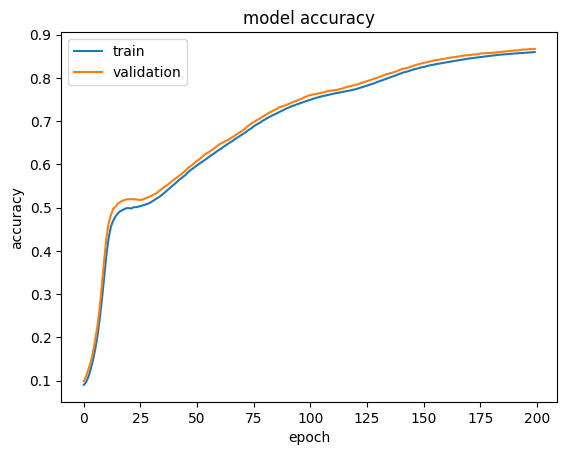

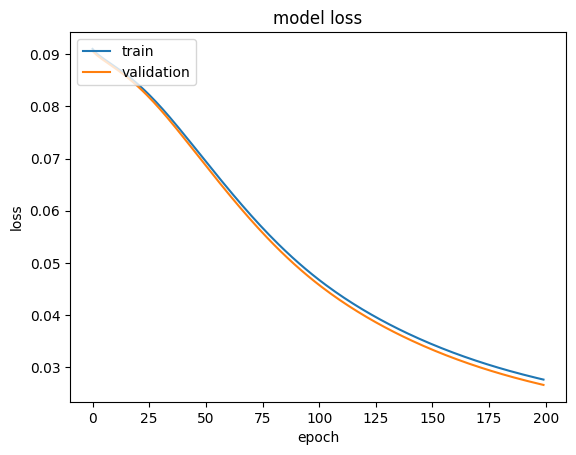

In [21]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Evaluate the model

In [22]:
model.evaluate(X_validation, y_validation)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8493 - loss: 0.0294


[0.026647524908185005, 0.8668000102043152]

## **PART 1** - *Your Turn*

### **Part 1 - Tasks:**  *(40 pts)*
1. Write code to display the confusion matrix for your classifier and comment on the insights such confusion matrix provides. See [this](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) for an example.

2. Write code to display 10 cases where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

#### 1.a. Confusion Matrix *(10 pts)*

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


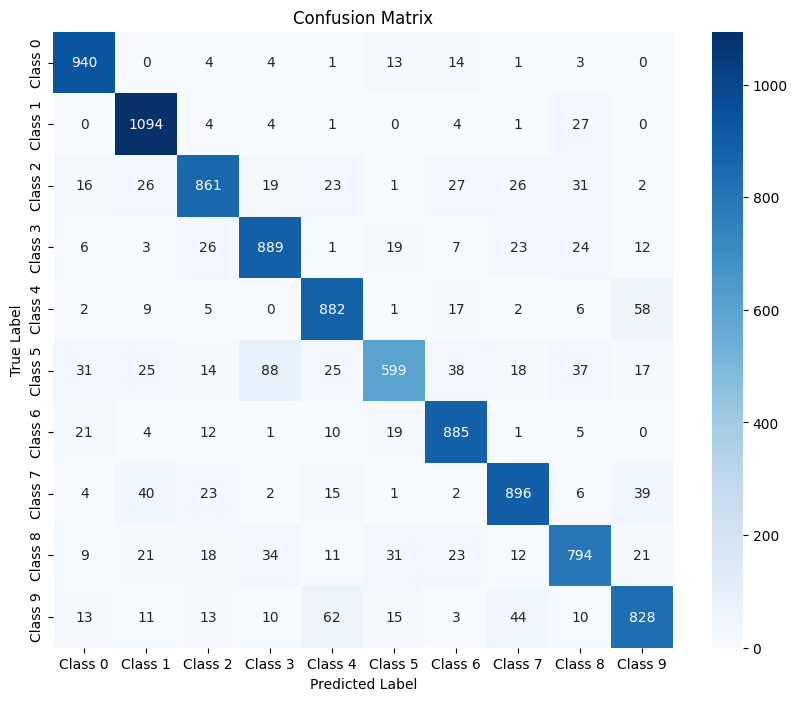

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the class names
classes_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']

# Get predicted probabilities
y_pred_prob = model.predict(X_validation)

# Convert probabilities to predicted labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_valid, y_pred)
# Display confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()





#### 1.b. Comment on the insights confusion matrix provides *(10 pts)*

The confusion matrix offers important insights into how well a categorization model performs. By contrasting the genuine labels from the validation set with the predicted labels, it provides a visual summary of the model's predictions. The confusion matrix can provide the following information:
True Positives (TP): In the confusion matrix, the diagonal elements represent the cases that were correctly categorized into each class. A greater value along the diagonal denotes more accurate forecasts.
False Negatives (FN) are the cases that were wrongly identified as belonging to a different class but actually fall within a specific class. The values in each row, omitting the diagonal element, reflect these examples. It shows how many examples for each class were either overlooked or wrongly categorized.
True Negatives (TN): The values outside of each class's diagonal and outside of its related rows and columns are accurately predicted cases that don't fall under the corresponding classes. The confusion matrix may occasionally not directly display the TN values.
You can learn a lot by studying the confusion matrix, including:
Overall Model Performance: By adding up the values on the diagonal and dividing it by the total number of instances, you can determine the model's overall accuracy. Performance is improved when the values along the diagonal are higher.
Performance per class: The confusion matrix enables you to assess the model's effectiveness in each specific class. By examining the numbers off the diagonal, you may determine which classes are more difficult for the model to appropriately categorize. It aids in determining whether the model tends to misclassify particular classes or if it excels at handling particular classes.
Unbalanced Classes: If the class distributions in the dataset are unbalanced, the confusion matrix may reveal potential problems. Instances from the majority class may be more likely to be misclassified by the model if, for instance, one class has a much higher number of instances than the others.
Error Patterns: By looking at the values that are off the diagonal, you can spot certain error patterns or class misunderstandings. It assists in identifying the classes that are commonly confused with one another and can offer suggestions for future model or dataset enhancements.
The confusion matrix is a useful tool for assessing the effectiveness of a classification model and learning about its advantages, disadvantages, and prospective areas for development.


#### 2.Display 10 cases where the classifier makes mistakes. *(20 pts)*

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


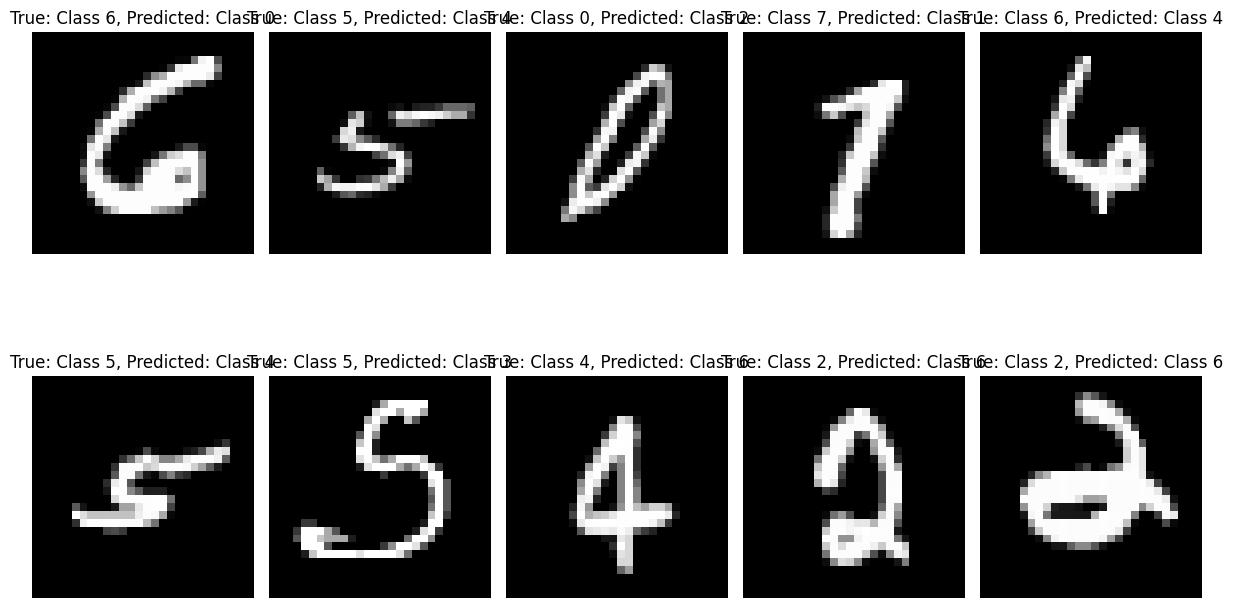

In [24]:
import matplotlib.pyplot as plt
import numpy as np


# Get predicted probabilities
y_pred_prob = model.predict(X_validation)

# Convert probabilities to predicted labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Find indices where true labels and predicted labels don't match
incorrect_indices = np.where(y_valid != y_pred)[0]

# Randomly select 10 incorrect predictions
incorrect_samples = np.random.choice(incorrect_indices, size=10, replace=False)

# Display the true and predicted labels for the selected samples
plt.figure(figsize=(12, 8))
for i, sample_idx in enumerate(incorrect_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_valid[sample_idx], cmap='gray')
    plt.title("True: {}, Predicted: {}".format(classes_names[y_valid[sample_idx]], classes_names[y_pred[sample_idx]]))
    plt.axis('off')
plt.tight_layout()
plt.show()




## PART 2 - *Fashion MNIST*




### Load and prepare the data

In [25]:
# Model / data parameters
num_classes = 10
input_shape = [28 ,28]

In [26]:
# Loading and Spliting Data in Test and Train
(X_train, y_train), (X_valid, y_valid) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_valid.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_valid.shape == (10000,)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Defining Classes

In [27]:
classes_names = ['T-shirt/top' ,  'Trouser' ,'Pullover' , 'Dress', 'Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle Boot']

### Examine Data

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
y_valid.shape

(10000,)

In [30]:
y_train[0:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

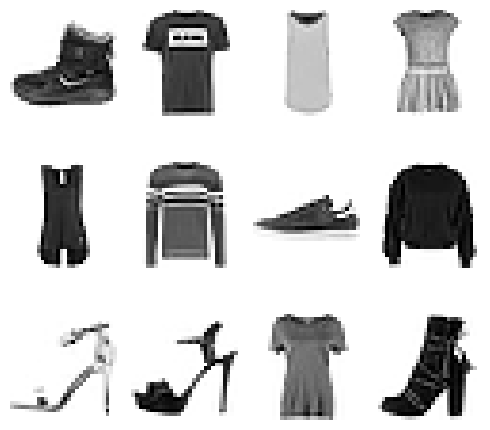

In [31]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [32]:
X_valid.shape

(10000, 28, 28)

In [33]:
y_valid.shape

(10000,)

In [34]:
y_valid[0]

np.uint8(9)

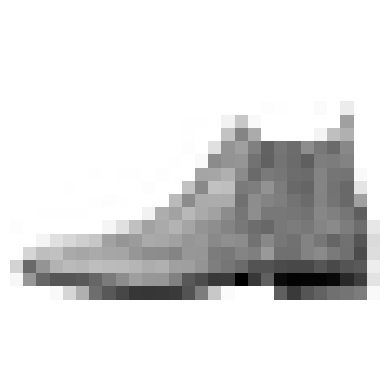

In [35]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [36]:
# Reshape (flatten) images
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [37]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [38]:
print(y_valid[0])
print(y_validation[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## **PART 2** - *Your Turn*

### **Part 2 - Tasks:** *(60 pts)*
Build a NN solution identical to the one before: *(20 pts)*
> a. Plot learning curves *(10 pts)*

> b. Display the confusion matrix for your classifier *(10 pts)*

> c. Evaluate the model, identify accuracy, etc. *(10 pts)*

> d. Discuss why the results are not as good. *(10 pts)*





#### NN solution *(20 pts)*

Configure the Model *(10 pts)*

In [39]:
# Your Configure the Model code here and in additional code cells as needed
# use same model and hyperparameters as was used for MNIST above
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Model configuration
num_classes = 10
input_shape = (784,)

# Build the model
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the Model  *(10 pts)*

In [40]:
# Your Train the Model code here and in additional code cells as needed
# same as was used in MNIST above
# Train the model
batch_size = 128
epochs = 200
history = model.fit(
    X_training,
    y_training,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_validation, y_validation)
)


Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3664 - loss: 2.1215 - val_accuracy: 0.6495 - val_loss: 1.5968
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6606 - loss: 1.4848 - val_accuracy: 0.6883 - val_loss: 1.2384
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6985 - loss: 1.1753 - val_accuracy: 0.7107 - val_loss: 1.0503
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7242 - loss: 1.0085 - val_accuracy: 0.7225 - val_loss: 0.9392
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7332 - loss: 0.9092 - val_accuracy: 0.7287 - val_loss: 0.8653
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7431 - loss: 0.8416 - val_accuracy: 0.7404 - val_loss: 0.8130
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7533 - loss: 0.7949 - val_accuracy: 0.7451 - val_loss: 0.7737
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7595 - loss: 0.7517 - val_accu

#### Plot learning curves *(10 pts)*

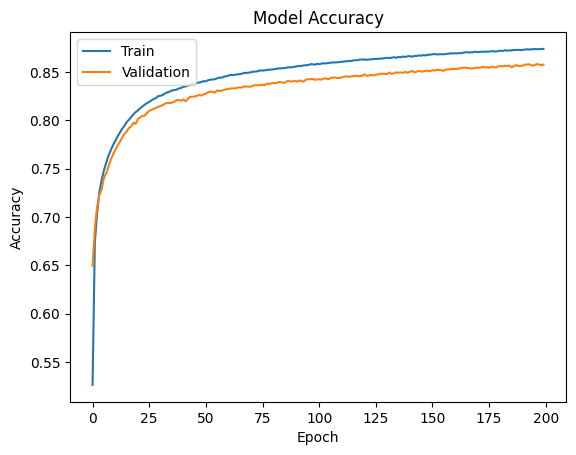

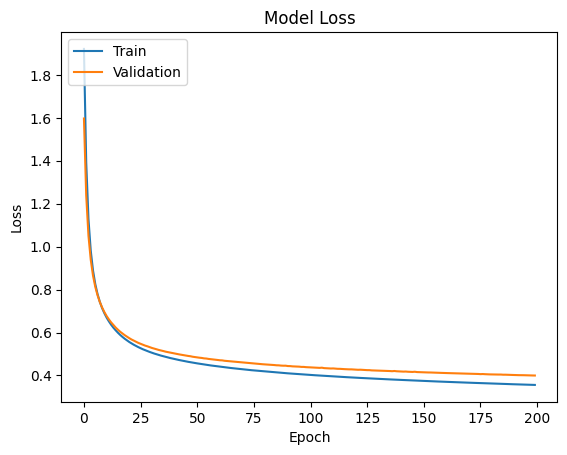

In [41]:
# Plot learning curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



#### Display the confusion matrix for your classifier *(10 pts)*

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


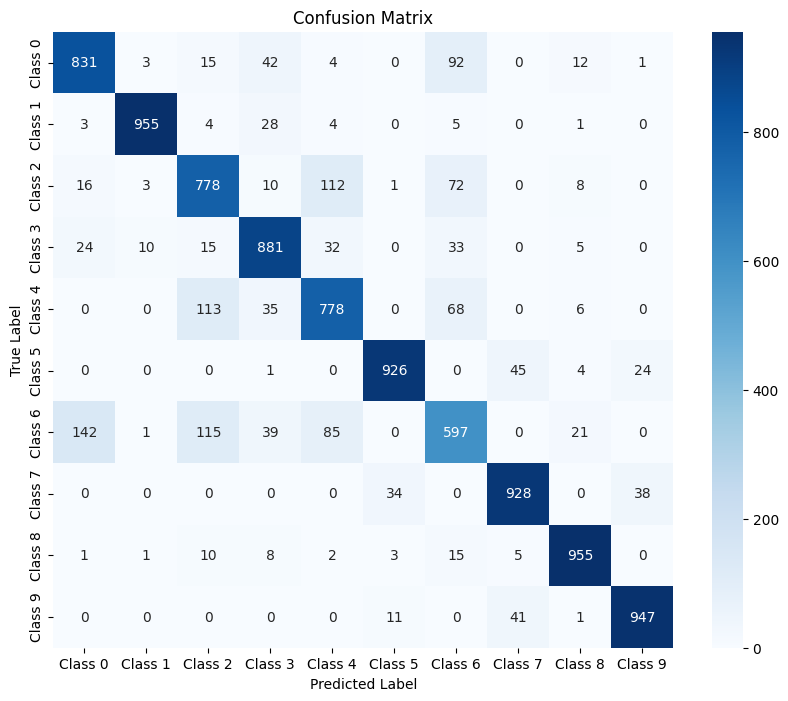

In [42]:
# Your confusion matrix code here and in additional code cells as needed
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Define the class names
classes_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']

# Get predicted labels
y_pred = np.argmax(model.predict(X_validation), axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



#### Evaluate the model, identify accuracy, etc. *(10 pts)*

In [43]:
# Your Evaluate the model code here and in additional code cells as needed
# Evaluate the model
loss, accuracy = model.evaluate(X_validation, y_validation)

# Print the accuracy
print("Accuracy:", accuracy)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.3964
Accuracy: 0.8575999736785889


#### Discuss why the results are not as good.

If you had more time what would you do to improve the results? *(10 pts)*

There may be a number of factors to consider if the results are not what was anticipated.

Low accuracy may result from the model's inability to understand enough patterns and changes in the data if it was trained on a tiny dataset.


Overfitting: When a model learns to perform well on training data but is unable to generalize to novel, untried data, overfitting has taken place. Overfitting can be decreased by using regularization techniques like dropout or weight decay.

Model complexity: A too-simple model could have trouble capturing intricate data patterns. Performance can be enhanced by expanding the model's capacity or applying more sophisticated topologies.

Fine-tuning:The performance of the model may be greatly affected by hyperparameters like learning rate, batch size, or optimizer selection.

If I had additional time to enhance the outcomes, I would think about taking the following actions:

Data augmentation: Produce more training examples by randomly rotating, translating, scaling, or flipping the original data. The training set's diversity and variability can be increased with the use of data augmentation, which will boost generalization.

Utilize the diversity of predictions by combining different models, either through bagging or boosting methods, to potentially improve performance.

Use pre-trained models—such as those developed using extensive picture datasets like ImageNet—and fine-tune them for the particular task at hand. Utilizing the knowledge and representations acquired from one activity to enhance performance on another related task is known as transfer learning. To avoid overfitting and enhance generalization, use regularization techniques like dropout, L1 or L2 regularization, or batch normalization.

Investigate various model designs or turn to automated methods like neural architecture search (NAS) to find better network topologies adapted to the given dataset and issue.

Cross-validation: Use cross-validation to determine the model's performance with greater accuracy and to identify any potential problems, such as overfitting or data leakage.

Examining misclassified samples and analyzing the model's predictions will help you find any patterns, biases, or places where the model falls short. This analysis may serve as a roadmap for future model or data preparation enhancements.

Deploy the model in the actual world and monitor it there while gathering feedback from users or other systems using it. Analyze forecasts, keep an eye on the model's performance, and make adjustments depending on feedback from the real world.

It is feasible to enhance the outcomes and create a model that is more reliable and accurate by addressing these factors.

[ ]
# (OPTIONAL) Additional code to demonstrate possible improvements to the model in Part 2.


In [44]:
# (OPTIONAL) Additional code to demonstrate possible improvements to the model in Part 2.